Membuat Aplikasi Data Mining Estimasi Harga Mobil Bekas Menggunakan Algoritma Linier

In [58]:
#Deskripsi library yang digunakan

import csv as csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Untuk memanggil dataset

df = pd.read_csv('bmw.csv')

NameError: name 'pd' is not defined

In [80]:
#Deskripsi dataset

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [4]:
df.describe()

NameError: name 'df' is not defined

In [ ]:
#Visualisasi data

plt.figure(figsize=(10,10))
plt.pie(df['model'])

In [93]:
#Jumlah mobil berdasarkan model

models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax' : 'numberOfCars'})

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'])
plt.xticks(rotation=60)

In [98]:
#Ukuran mesin

engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
engine = engine.rename(columns={'tax' : 'numberOfCars'})

In [109]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['tax'])

KeyError: 'tax'

<Figure size 1500x500 with 0 Axes>

C:\Users\sinta\AppData\Local\Temp\ipykernel_17260\1342886761.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

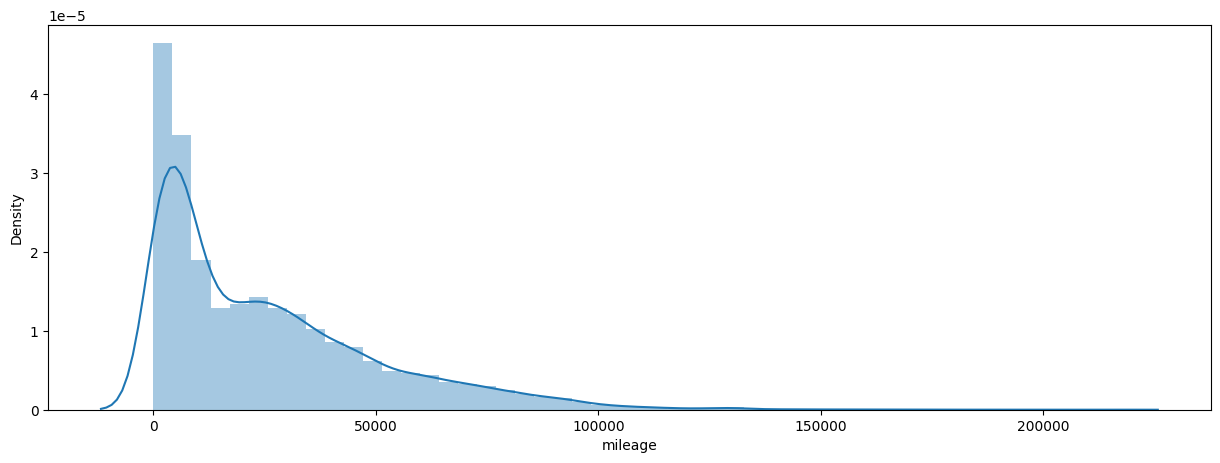

In [103]:
#Distribusi mileage

plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

C:\Users\sinta\AppData\Local\Temp\ipykernel_17260\3290255246.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

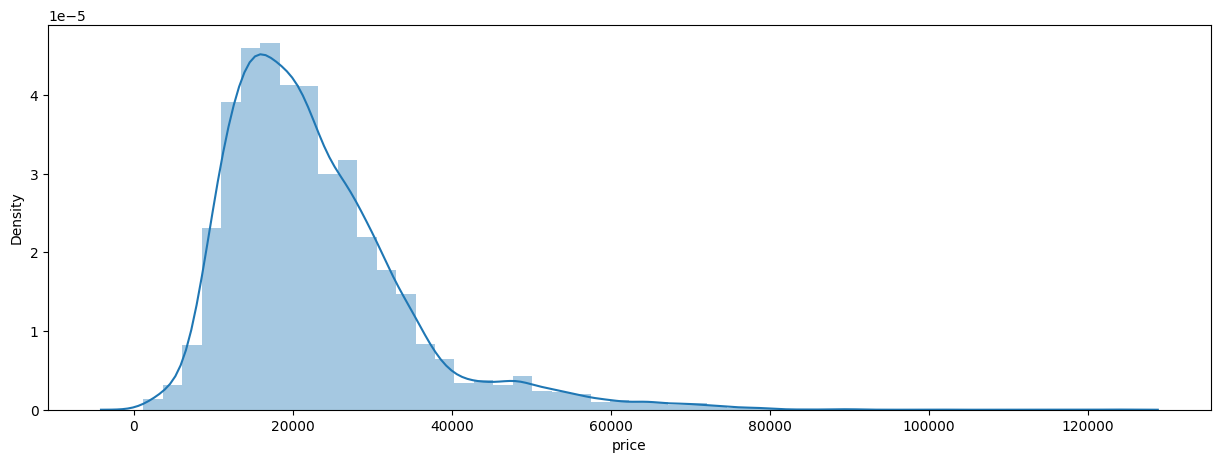

In [106]:
#Distribusi Harga Mobil

plt.figure(figsize=(15,5))
sns.distplot(df['price'])

In [110]:
#Seleksi fitur

features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((10781, 5), (10781,))

In [113]:
#Split data training dan data testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=75)
y_test.shape

#pengambilan data sebanyak 2696 untuk data testing

(2696,)

In [117]:
#Membuat model regresi linier

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [116]:
score = lr.score(x_test, y_test)
print('Akurasi model regresi linier = ', score)

Akurasi model regresi linier =  0.6649164391819451


In [123]:
#Membuat inputan model regresi linier
#deskripsi : year=2018, mileage=4000, tax=150, mpg=28, engineSize=3

input_data = np.array([[2018,4000,150,28,3]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [35068.65022813]


c:\Users\sinta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [125]:
#Save model 

import pickle

filename = 'estimasi_harga_mobil.sav'
pickle.dump(lr,open(filename,'wb'))